<a href="https://colab.research.google.com/github/JumanaKhrais/Operating-Systems-Project/blob/main/CLUSTERING_JumanKhrais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- **In this Notebook, the clustering algorithms: K-medoiod, Hierarchical Agglomerative Clustering Algorithm and DBSCAN are used**
- **Credit Card Fraud Detection dataset is used which consists of 30 attributes and it is highly imbalanced and many scholary works aimed to handle the imbalance nature of it** 



**Clustering is the firt phase in the workflow pipeline, so in this notebook I startred with deploying the three mentioned clustering algorithms on a subset of the dataset**

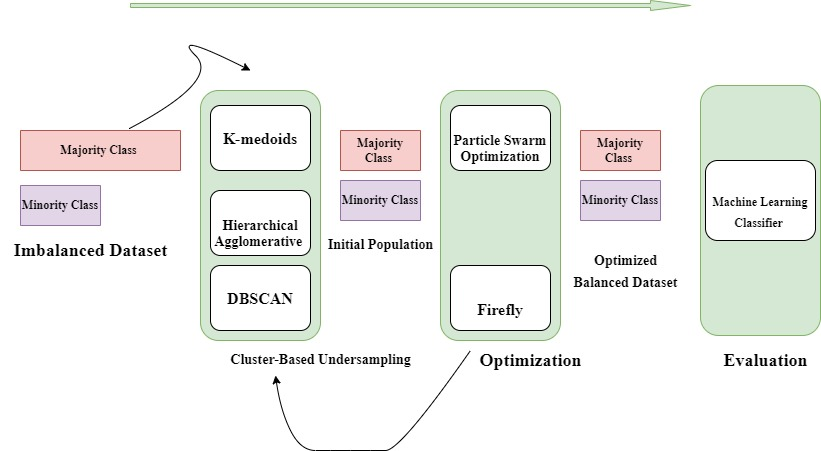

# **Mointing Drive and Importing Libraries**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install scikit-learn-extra


In [ ]:
!pip install install kneed

In [48]:
import pandas as pd
from sklearn_extra.cluster import KMedoids 
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import v_measure_score
from sklearn import preprocessing
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
from matplotlib import rcParams
from sklearn.neighbors import NearestNeighbors
import numpy as np
from kneed import KneeLocator



%matplotlib inline

# **Dataset Information**

In [ ]:
data = pd.read_csv('/content/drive/My Drive/Third-Semester/Meta-heuristic-project/creditcard.csv')

In [ ]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


**Dataset attributes are of numerical type**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

**The dataset is highly imbalanced**

In [ ]:
data['Class'].value_counts() 

0    284315
1       492
Name: Class, dtype: int64

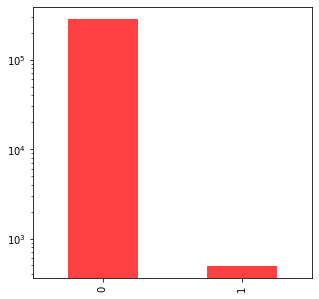

In [ ]:
rcParams['figure.figsize'] = 5,5
data['Class'].value_counts().plot(kind='bar',alpha=0.75, rot=90, logy=True, color= 'red')

**For proof of concept purposes I will work on a subset of the dataset**

In [39]:
subset = data.iloc[0:200, 0:31]
features = subset.iloc[:,:30]

**For visulaizing the clustering results in 2-D this done by applying principal component analysis (PCA) on the dataset to reduce its dimension to only two while still preserving the information. And then clustering can be applied to this transformed dataset and then visualized in a 2-D plot. Moreover, PCA can also help to avoid the curse of dimensionality.**

In [40]:
#scaling 
scaler = MinMaxScaler()
scale = scaler.fit_transform(features)
df_scale = pd.DataFrame(scale, columns =features.columns);
df_scale.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.000000,0.623955,0.709926,0.889128,0.686013,0.634827,0.358853,0.391943,0.723451,0.402702,...,0.246277,0.283466,0.720725,0.572675,0.604486,0.553431,0.244764,0.515872,0.504818,0.038897
1,0.000000,0.960312,0.729908,0.633141,0.577768,0.675007,0.283899,0.349568,0.720933,0.301246,...,0.214038,0.218504,0.504488,0.607899,0.464385,0.570542,0.317860,0.486594,0.515916,0.000507
2,0.007576,0.624147,0.635205,0.806696,0.569810,0.618197,0.542968,0.465390,0.751040,0.094926,...,0.273796,0.366851,0.837239,0.742318,0.344033,0.351367,0.256370,0.477069,0.492815,0.098741
3,0.007576,0.675831,0.703296,0.808833,0.425126,0.667913,0.466838,0.391679,0.775070,0.115837,...,0.200060,0.255287,0.656417,0.559394,0.176543,0.783247,0.237149,0.501322,0.530411,0.032072
4,0.015152,0.650527,0.765965,0.782447,0.572517,0.627880,0.308429,0.438969,0.655074,0.477080,...,0.262083,0.286245,0.843515,0.568187,0.630089,0.405244,0.405202,0.533509,0.578085,0.018091


In [41]:
#PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(df_scale)
pca_df = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
pca_df.head()

,principal component 1,principal component 2
0,0.037703,-0.534010
1,-0.429831,-0.342368
2,-0.431095,-0.304814
3,-0.128789,-0.483863
4,-0.038602,-0.443055


# **K-Medoids Clustering**

**I followed this tutrorial, but using K-Mediod instead of K-means**:
- https://machinelearningknowledge.ai/tutorial-for-k-means-clustering-in-python-sklearn/#:~:text=Step%2D1%3ATo%20decide%20the,new%20centroid%20for%20every%20cluster.

**The Elbow Method is a popular technique for determining the optimal number of clusters. Here, we calculate the Within-Cluster-Sum of Squared Errors (WCSS) for various values of k and choose the k for which WSS first starts to diminish. In the plot of WSS-versus-k, this can be observed as an elbow.**

In [ ]:
K=range(2,20)
wss = []

for k in K:
    kmedioid = KMedoids(n_clusters=k)
    kmedioid= kmedioid.fit(pca_df)
    wss_iter = kmedioid.inertia_
    wss.append(wss_iter)

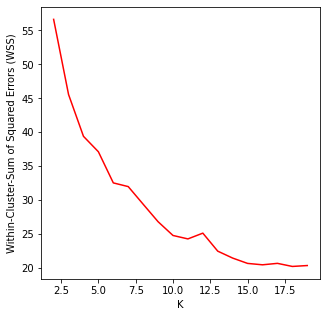

In [ ]:
plt.xlabel('K')
plt.ylabel('Within-Cluster-Sum of Squared Errors (WSS)')
plt.plot(K,wss, color = 'red')

**Number of cluster (K) it is the point after which WCSS does not diminish much with the increase in value of K**

In [ ]:
#k = 13
kmedioid = KMedoids(n_clusters=13)
kmedioid= kmedioid.fit(pca_df) #applying it on the pca dataset

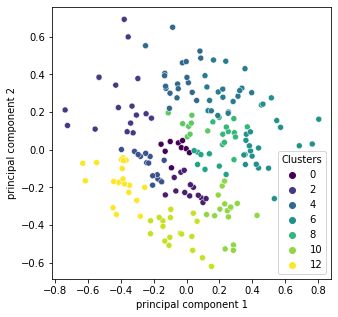

In [ ]:
temp_df = pca_df
temp_df['Clusters'] = kmedioid.labels_

sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=temp_df,palette='viridis')

In [ ]:
temp_df.head()

,principal component 1,principal component 2,Clusters
0,0.037006,-0.534172,11
1,-0.427090,-0.343270,12
2,-0.446960,-0.307585,12
3,-0.132015,-0.484677,11
4,-0.038590,-0.443399,11


#**Hierarchical Agglomerative Clustering Algorithm**

**I make use of:**
- https://www.youtube.com/watch?v=ijUMKMC4f9I&list=PLaFfQroTgZnyxGm6hz4lWLaMbslG0KDSG&index=9

- https://towardsdatascience.com/machine-learning-algorithms-part-12-hierarchical-agglomerative-clustering-example-in-python-1e18e0075019

- https://towardsdatascience.com/cheat-sheet-to-implementing-7-methods-for-selecting-optimal-number-of-clusters-in-python-898241e1d6ad#:~:text=To%20get%20the%20optimal%20number,the%20distance%20between%20those%20clusters.


**Dendrograms are used to figure out the optimal number of clusters:**

- **Determine the largest vertical distance that doesn’t intersect any of the other clusters**
- **Draw a horizontal line at both extremities**
- **The optimal number of clusters is equal to the number of vertical lines going through the horizontal line**

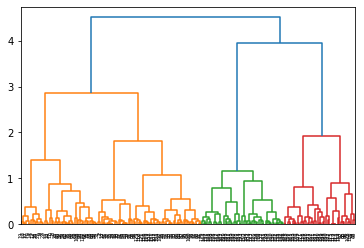

In [31]:
#applying Dendrogram 
dendrogram = sch.dendrogram(sch.linkage(pca_df, method='ward'))


In [32]:
#number of clusters = 4
model = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
model.fit(pca_df) #applying on pca_df 
labels = model.labels_

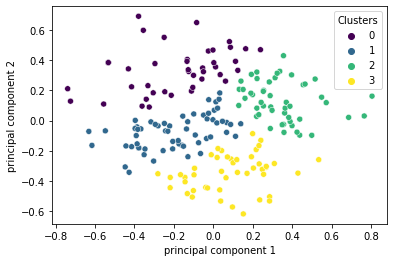

In [33]:
temporary_df = pca_df
temporary_df ['Clusters'] = labels

sns.scatterplot(x="principal component 1", y="principal component 2",hue = 'Clusters',  data=temporary_df ,palette='viridis')

#**DBSCAN Clustering**

**I make use of:**
- https://machinelearningknowledge.ai/tutorial-for-dbscan-clustering-in-python-sklearn/ 

Text(0, 0.5, '$PCA_2$')

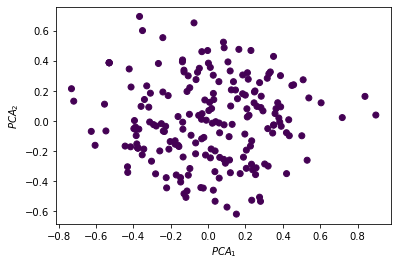

In [43]:
#plotting data before clustering
plt.scatter(pca_df['principal component 1'], pca_df['principal component 2'], c=subset['Class'], label=subset['Class'])
plt.xlabel("$PCA_1$")
plt.ylabel("$PCA_2$")

**DBSCAN need two parameters:**
- **eps: Epsilon is the radius of the circle around a data point such that all other data points that fall inside the circle are considered as neighborhood points.**

- **min_samples: is the minimum number of data points that should be there in the region to define the cluster.**


**Finding the Optimal value of Epsilon: using  the elbow point detection method to arrive at a suitable value of epsilon**


Text(0, 0.5, 'Distance')

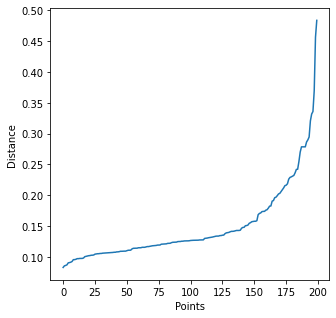

In [46]:
nearest_neighbors = NearestNeighbors(n_neighbors=11)
neighbors = nearest_neighbors.fit(pca_df)

distances, indices = neighbors.kneighbors(pca_df)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

0.19609978549310889


<Figure size 360x360 with 0 Axes>

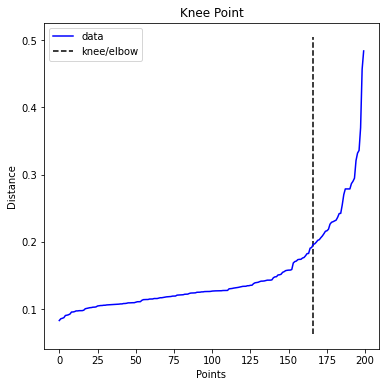

In [49]:

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

Estimated no. of clusters: 1


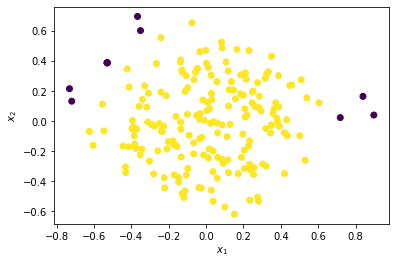

In [52]:
#eps = 0.196
dbscan_cluster1 = DBSCAN(eps=0.196, min_samples=10)
dbscan_cluster1.fit(pca_df)

# Visualizing DBSCAN
plt.scatter(pca_df['principal component 1'], 
            pca_df['principal component 2'], 
            c=dbscan_cluster1.labels_, 
            label=subset['Class'])
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

# Number of Clusters
labels=dbscan_cluster1.labels_
N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)
